In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd

try: #spelling depends on enviroment version 
    import urllib2 as urllib #URL handling module
except ImportError:
    import urllib.request as urllib
import json

sns.set_theme(style="whitegrid")

### NYC EV Fleet STATION NETWORK

This list of addresses for EV charging sites is intended for City Vehicle Operators: https://data.cityofnewyork.us/City-Government/NYC-EV-Fleet-Station-Network/fc53-9hrv/about_data

DCAS provides public access to a selected list of the fleet EV chargers above. Members of the public may charge their EVs at these sites for a nominal charging fee. 

A list of publicly available chargers can be found here: https://www.nyc.gov/assets/dcas/downloads/pdf/fleet/electric-vehicle-public-charging-rules.pdf. 

In [2]:
# NYC EV Fleet Station Network
ev_fleet = pd.read_json('https://data.cityofnewyork.us/resource/fc53-9hrv.json')
ev_fleet = ev_fleet[ [col for col in ev_fleet.columns if col not in ['community_district', 'council_district', 'census_tract', 'bin', 'bbl','nta']] ]
ev_fleet

,agency,station_name,type_of_charger,no_of_ports,street,city,postcode,borough,latitude,longitude,public_charger_,fee_for_city_drivers
0,ACS,NYC FLEET / ACS_LINDEN_1_L3,Level 3 Fast Charger,1,2554 Linden Blvd,East New York,11208,Brooklyn,40.668034,-73.869949,NaN,NaN
1,ACS,NYC FLEET / ACS_LINDEN_2_L3,Level 3 Fast Charger,1,2554 Linden Blvd,East New York,11208,Brooklyn,40.668034,-73.869949,NaN,NaN
2,ACS,NYC FLEET / ACS_LINDEN-1,Level 2 Charger,1,2554 Linden Blvd,Brooklyn,11208,Brooklyn,40.668034,-73.869949,NaN,NaN
3,ACS,NYC FLEET / ACSSTMARKSPL1,Level 2 Charger,1,350 St Marks Pl,Staten Island,10301,Staten Island,40.640708,-74.077697,NaN,NaN
4,CITYHALL,NYC FLEET / CITYHALL EAST,Level 2 Charger,2,New York City Hall,New York,10007,Manhattan,40.712806,-74.006096,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FDNY,NYC FLEET / FDNY_FAB9-1,Level 2 Charger,1,Randalls Island Fire Academy,New York,10035,Manhattan,40.795535,-73.922671,NaN,NaN
996,FDNY,NYC FLEET / FDNY_FORTTOTT#1,Level 2 Charger,1,325 Pratt Ave,Queens,11359,Queens,40.791437,-73.774482,NaN,NaN
997,FDNY,NYC FLEET / FDNY_FTB400B-1,Level 2 Charger,1,400 Murray Ave,Queens,11359,Queens,40.792730,-73.777616,NaN,NaN
998,FDNY,NYC FLEET / FDNY_REVIEW-1,Level 2 Charger,1,30-30 Review Ave,Queens,11101,Queens,40.736818,-73.939753,NaN,NaN


/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/3114297679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_fleet.groupby('agency').sum()['no_of_ports'].sort_values().plot.barh()


<Axes: ylabel='agency'>

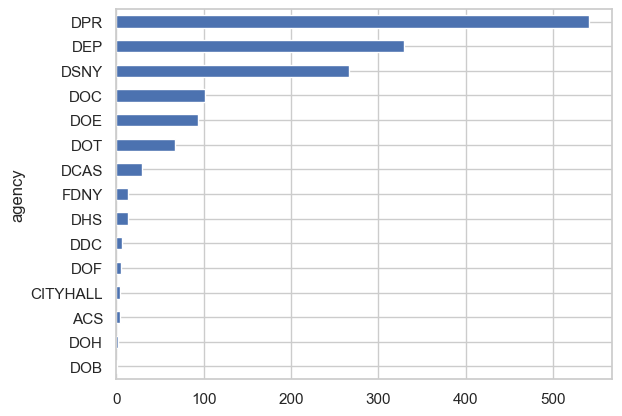

In [3]:
ev_fleet.groupby('agency').sum()['no_of_ports'].sort_values().plot.barh()

<Axes: >

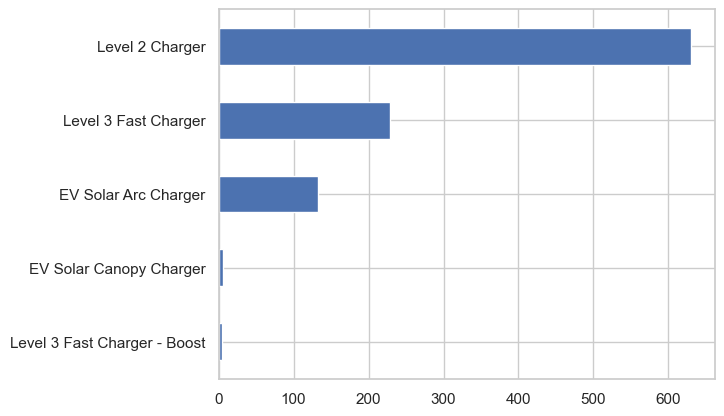

In [4]:
ev_fleet['type_of_charger'].value_counts().sort_values().plot.barh()

In [8]:
# visualize fleet distribution by agency
boro_data = gpd.read_file("boundary/geo_export_53393ea0-2764-43a7-a119-a4724fae36b5.shp")

def FleetMap(agency, full_name):
    ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()

    ev_agency_gpd = gpd.GeoDataFrame(
        geometry=gpd.points_from_xy(ev_agency.longitude, ev_agency.latitude, crs="EPSG:4326"), data=ev_agency
    )

    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    boro_data.plot(ax=ax, cmap='Spectral_r', alpha=0.7)
    ax.set_axis_off()

    ev_agency_gpd.plot(ax=ax, markersize=ev_agency_gpd['no_of_ports']*10, edgecolor='black', linewidth = 1)

    ax.set_title('Municipal Fleet Chargers from {}'.format(full_name))

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/2716363225.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()


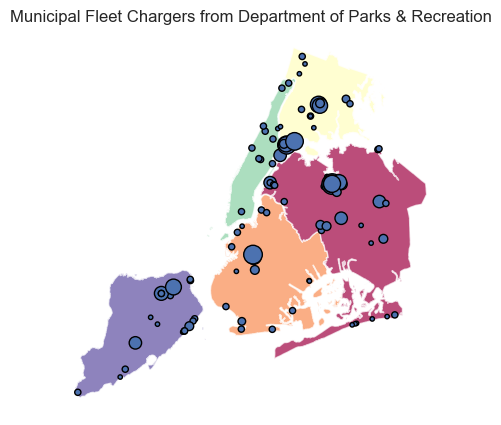

In [9]:
agency = 'DPR'
full_name = "Department of Parks & Recreation"
FleetMap(agency, full_name)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/2716363225.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()


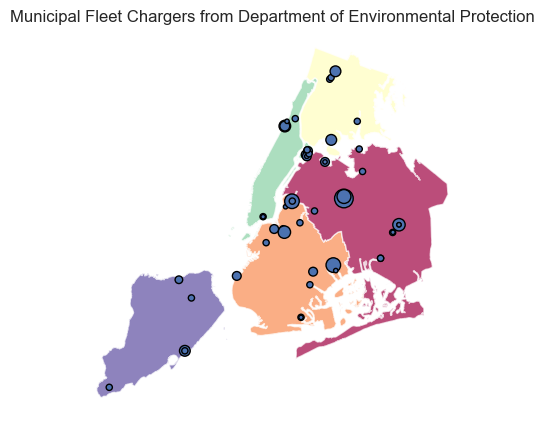

In [10]:
agency = 'DEP'
full_name = "Department of Environmental Protection"
FleetMap(agency, full_name)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/2716363225.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()


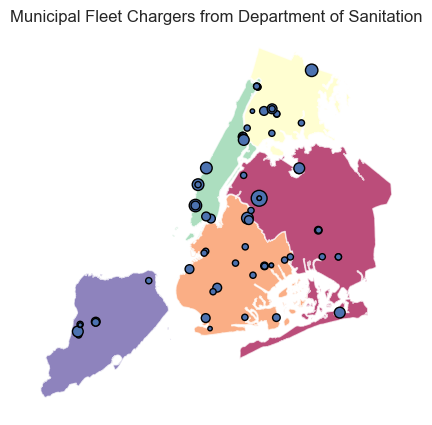

In [11]:
agency = 'DSNY'
full_name = "Department of Sanitation"
FleetMap(agency, full_name)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/2716363225.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()


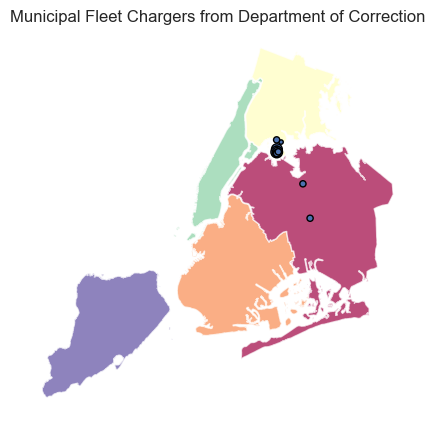

In [13]:
agency = 'DOC'
full_name = "Department of Correction"
FleetMap(agency, full_name)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/2716363225.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()


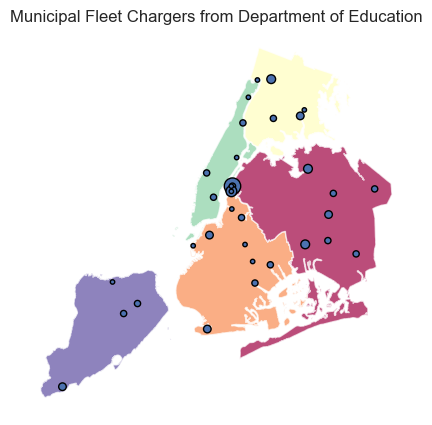

In [14]:
agency = 'DOE'
full_name = "Department of Education"
FleetMap(agency, full_name)

/var/folders/pn/46n_x6m91tdcfl9d66wj2f3w0000gn/T/ipykernel_68010/2716363225.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ev_agency = ev_fleet[ev_fleet['agency']==agency].groupby(by=['street','latitude','longitude']).sum()[['no_of_ports']].reset_index()


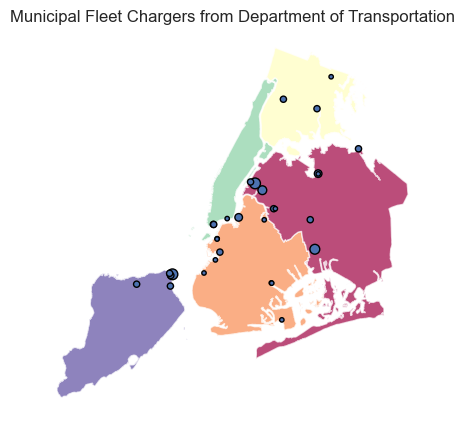

In [12]:
agency = 'DOT'
full_name = "Department of Transportation"
FleetMap(agency, full_name)